<a href="https://colab.research.google.com/github/danieljnrkb1/tutorial-/blob/main/Copy_of_Energy_Consumption_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os # creates an interaction between the operating system 

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 
import datetime 

import xgboost as xgb # machine learning algorithm 
from xgboost import plot_importance
from sklearn import tree
from sklearn.metrics import mean_squared_error # performance assessment 
from sklearn.metrics import mean_absolute_error # performance assessment 

plt.style.use("ggplot") 
%matplotlib inline 

Import data 

In [ ]:
path = "/content/drive/MyDrive/Machine Learning data/PJME_hourly.csv"
df = pd.read_csv(path)
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [ ]:
df["Datetime"] = pd.to_datetime(df["Datetime"]) # converts date and time to python format 
# Date features 
df["Hour"] = df["Datetime"].dt.hour
df["Day"] = df["Datetime"].dt.dayofweek
df["Month"] = df["Datetime"].dt.month
df["Year"] = df["Datetime"].dt.year 
df["Q"] = df["Datetime"].dt.quarter

df.index = df["Datetime"]
df = df.drop(["Datetime"], axis=1)
df.head()

,PJME_MW,Hour,Day,Month,Year,Q
Datetime,,,,,,
2002-12-31 01:00:00,26498.0,1,1,12,2002,4
2002-12-31 02:00:00,25147.0,2,1,12,2002,4
2002-12-31 03:00:00,24574.0,3,1,12,2002,4
2002-12-31 04:00:00,24393.0,4,1,12,2002,4
2002-12-31 05:00:00,24860.0,5,1,12,2002,4


Text(0.0, 1.0, 'Consumption distribution')

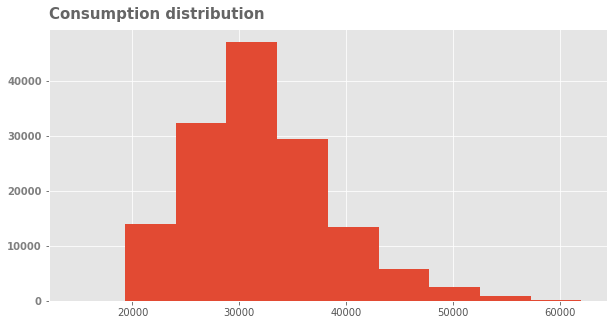

In [ ]:
ax, fig = plt.subplots(figsize=(10,5))
plt.hist(df["PJME_MW"])

plt.yticks(alpha = 0.75, weight = 'bold')

plt.xlabel("", alpha = 0.75, weight = 'bold')
plt.ylabel("", alpha = 0.75, weight = 'bold')

plt.title("Consumption distribution", alpha = 0.60 , weight = "bold", fontsize = 15, loc = "left", pad = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

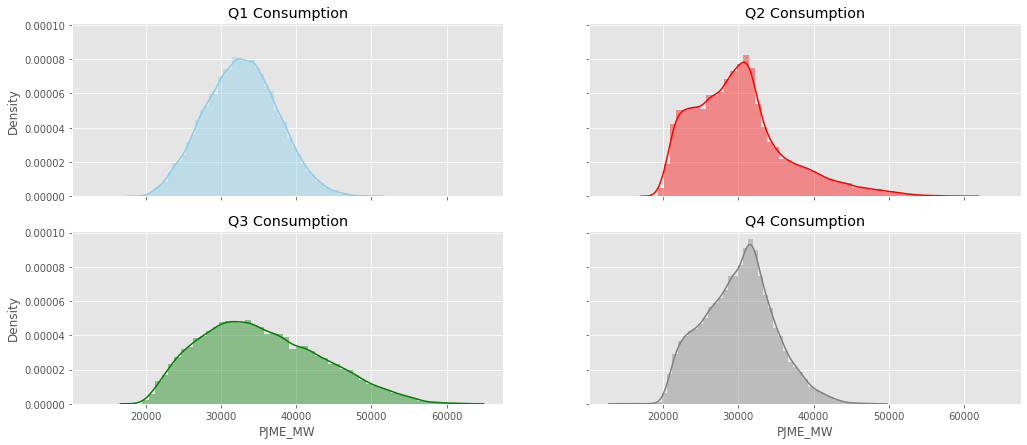

In [ ]:
# The distribution plot is left skewed ranging around 30-35k
# data preparation 
Q1 = df[df["Q"]==1]
Q2 = df[df["Q"]==2]
Q3 = df[df["Q"]==3]
Q4 = df[df["Q"]==4]

fig, axes = plt.subplots (2,2 ,figsize = (17,7),sharex = True, sharey = True)

sns.distplot(Q1["PJME_MW"], color = "skyblue", ax = axes[0,0]).set_title("Q1 Consumption")
sns.distplot(Q2["PJME_MW"], color = "red", ax = axes[0,1]).set_title("Q2 Consumption")
sns.distplot(Q3["PJME_MW"], color = "green", ax = axes[1,0]).set_title("Q3 Consumption")
sns.distplot(Q4["PJME_MW"], color = "grey", ax = axes[1,1]).set_title("Q4 Consumption")

del Q1,Q2, Q3, Q4




There are some major differences in the consumption distribution per quarter. This might be due to several factors, the most obvious being seasonal demand changes. Another major factor is the general temperature in the area. Higher temperatures encourage more electricity usage as office buildings and homes require cooling.

Text(0.0, 1.0, 'Mean daily Consumption')

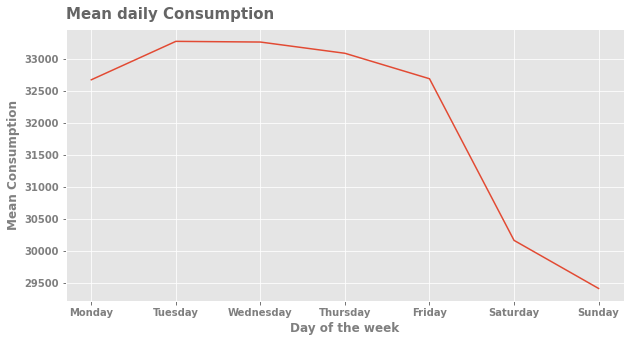

In [ ]:
#Data preparation
mean_per_day = df.groupby("Day")["PJME_MW"].agg(["mean"])

# plot 
fig,ax = plt.subplots(figsize = (10,5))

plt.plot(mean_per_day.index, mean_per_day["mean"])
plt.xticks(mean_per_day.index, ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], 
           alpha = 0.75, weight = "bold")
plt.yticks(alpha = 0.75, weight = "bold")


plt.xlabel ("Day of the week", alpha = 0.75, weight="bold")
plt.ylabel("Mean Consumption", alpha =0.75, weight = "bold")

plt.title("Mean daily Consumption", alpha = 0.6, weight = "bold", fontsize = 15, loc ="left", pad = 10)


The plot above showcases the cumulative consumption per day. We can very clearly see that days matter when it comes to consumption. The lowest usage is usually marked on the weekends as most commercial and industrial areas stay closed reducing the overall consumption of the area.

Text(0.0, 1.0, 'Mean Hourly Consumption')

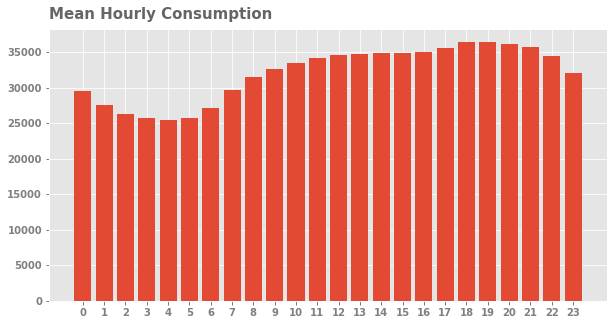

In [ ]:
# Data preparation 
mean_per_hour = df.groupby("Hour")["PJME_MW"].agg(["mean"])

fig, ax = plt.subplots(figsize = (10,5))
plt.bar(mean_per_hour.index, mean_per_hour["mean"])

plt.xticks(range(24), alpha = 0.75, weight = "bold")
plt.yticks(alpha = 0.75, weight = "bold")

plt.title("Mean Hourly Consumption", alpha = 0.6, weight = "bold", fontsize = 15, pad = 10, loc ="left" )